In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

In [2]:
data1 = pd.read_csv('data/Channel_1_900nm_2mm.csv', sep=';', encoding='cp1251')
data2 = pd.read_csv('data/Channel_2_900nm_2mm.csv', sep=';', encoding='cp1251')

In [3]:
data1 = data1['мВ']
data2 = data2['мВ']

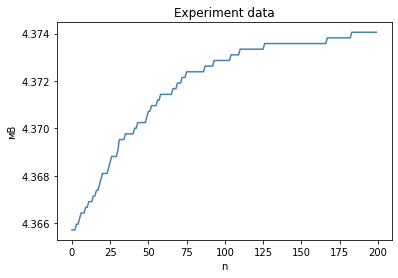

In [4]:
data1.plot(color = "steelblue")
plt.title('Experiment data')
plt.xlabel('n')
plt.ylabel('мВ')
plt.savefig('result/expdata_1.png', dpi = 1000)

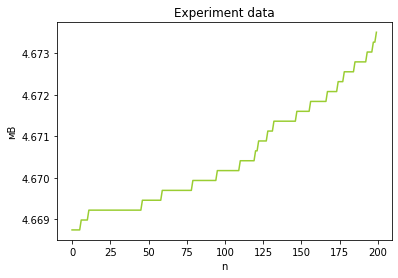

In [5]:
data2.plot(color = "yellowgreen")
plt.xlabel('n')
plt.ylabel('мВ')
plt.title('Experiment data')
plt.savefig('result/expdata_2.png', dpi = 1000)

In [6]:
eps = 1e-4

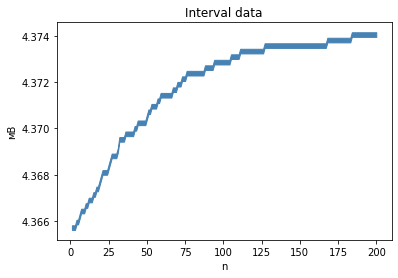

In [7]:
plt.fill_between(data1.index + 1, data1 - eps, data1 + eps, color = "steelblue")
plt.xlabel('n')
plt.ylabel('мВ')
plt.title('Interval data')
plt.savefig('result/data1_interval.png', dpi = 1000)

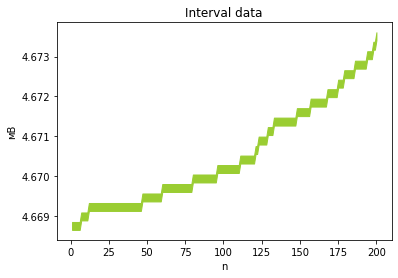

In [8]:
plt.fill_between(data2.index + 1, data2 - eps, data2 + eps, color = "yellowgreen")
plt.xlabel('n')
plt.ylabel('мВ')
plt.title('Interval data')
plt.savefig('result/data2_interval.png', dpi = 1000)

In [9]:
def load_processed(filename):
    A = 0
    B = 0
    w = []
    with open(filename) as f:
        A, B = [float(t) for t in f.readline().split()]
        for line in f.readlines():
            w.append(float(line))
    return A, B, w

In [10]:
A1, B1, w1 = load_processed('data/Ch1.txt')
A2, B2, w2 = load_processed('data/Ch2.txt')

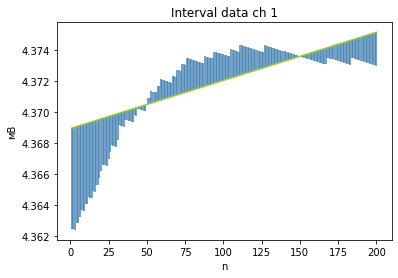

In [11]:
for i in data1.index:
    plt.vlines(i + 1, data1[i] + w1[i] * eps, data1[i] - w1[i] * eps, color = "steelblue")
plt.plot(np.arange(1, 201), A1 + B1 * (np.arange(1, 201)), label='lsm', color='yellowgreen')
plt.xlabel('n')
plt.ylabel('мВ')
plt.title('Interval data ch 1')
plt.savefig('result/intervaldata_1.png', dpi = 1000)

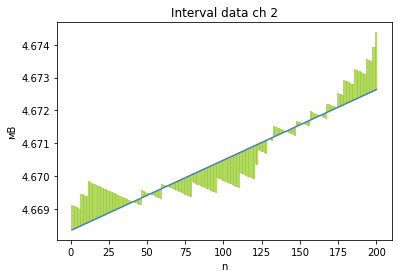

In [12]:
for i in data2.index:
    plt.vlines(i + 1, data2[i] + w2[i] * eps, data2[i] - w2[i] * eps, color = "yellowgreen")
plt.plot(np.arange(1, 201), A2 + B2 * (np.arange(1, 201)), label='lsm', color='steelblue')
plt.xlabel('n')
plt.ylabel('мВ')
plt.title('Interval data ch 2')
plt.savefig('result/intervaldata_2.png', dpi = 1000)

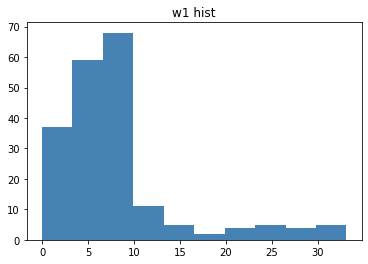

In [13]:
plt.hist(w1, color = "steelblue")
plt.title('w1 hist')
plt.savefig('result/w1.png', dpi = 1000)

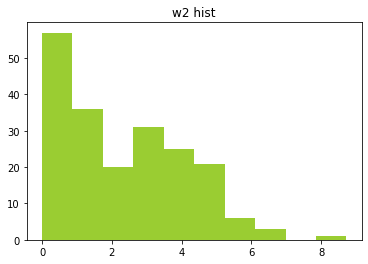

In [14]:
plt.hist(w2, color = "yellowgreen")
plt.title('w2 hist')
plt.savefig('result/w2.png', dpi = 1000)

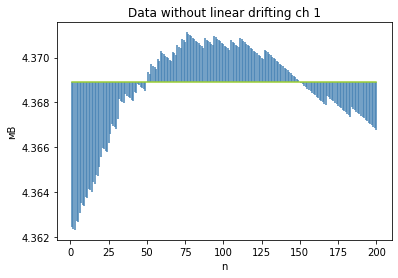

In [15]:
data1_fixed = [y - (i + 1) * B1 for i, y in enumerate(data1)]
for i in data1.index:
    plt.vlines(i + 1, data1_fixed[i] + w1[i]*eps, data1_fixed[i] - w1[i]*eps, color = "steelblue")
plt.plot(np.arange(1, 201), [A1]*200, label='lsm', color='yellowgreen')
plt.xlabel('n')
plt.ylabel('мВ')
plt.title('Data without linear drifting ch 1')
plt.savefig('result/data_wld_1.png', dpi = 1000)

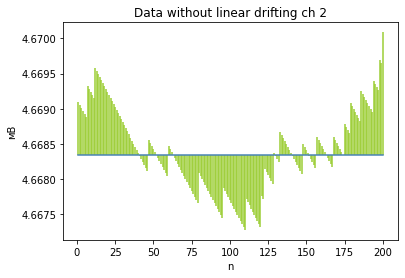

In [16]:
data2_fixed = [y - (i + 1) * B2 for i, y in enumerate(data2)]
for i in data2.index:
    plt.vlines(i + 1, data2_fixed[i] + w2[i]*eps, data2_fixed[i] - w2[i]*eps, color = "yellowgreen")
plt.plot(np.arange(1, 201), [A2]*200, label='lsm', color='steelblue')
plt.xlabel('n')
plt.ylabel('мВ')
plt.title('Data without linear drifting ch 2')
plt.savefig('result/data_wld_2.png', dpi = 1000)

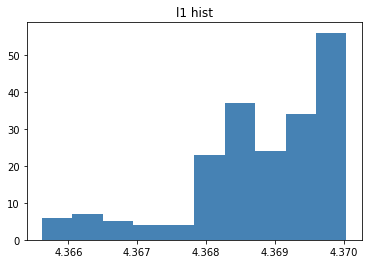

In [17]:
plt.hist(data1_fixed, color = "steelblue")
plt.title('l1 hist')
plt.savefig('result/l1.png', dpi = 1000)

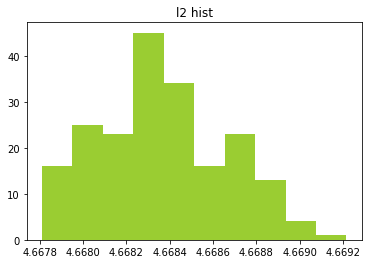

In [18]:
plt.hist(data2_fixed, color = "yellowgreen")
plt.title('l2 hist')
plt.savefig('result/l2.png', dpi = 1000)

In [19]:
data1_fixed_int = [[y - w1[i]*eps, y + w1[i]*eps] for i, y in enumerate(data1_fixed)]
data2_fixed_int = [[y - w2[i]*eps, y + w2[i]*eps] for i, y in enumerate(data2_fixed)]

In [20]:
def countJaccar(R):
    data1_new = [[data1_fixed_int[i][0] * R, data1_fixed_int[i][1] * R] for i in range(len(data1_fixed_int))]
    all_data = data1_new + data2_fixed_int
    min_inc = list(all_data[0])
    max_inc = list(all_data[0])
    for interval in all_data:
        min_inc[0] = max(min_inc[0], interval[0])
        min_inc[1] = min(min_inc[1], interval[1])
        max_inc[0] = min(max_inc[0], interval[0])
        max_inc[1] = max(max_inc[1], interval[1])
    JK = (min_inc[1] - min_inc[0]) / (max_inc[1] - max_inc[0])
    return JK

In [21]:
R_interval = np.linspace(1, 1.1, 1000)
Jaccars = []
for R in R_interval:
    Jaccars.append(countJaccar(R))

optimal_x = opt.fmin(lambda x: -countJaccar(x), 1.068531955)
min1 = opt.root(countJaccar, 1.068531955 + eps)     
max1 = opt.root(countJaccar, 1.068531955 - eps) 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 38


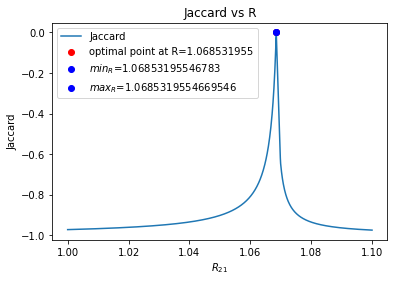

In [22]:
plt.plot(R_interval, Jaccars, label="Jaccard", zorder=1)
plt.scatter(optimal_x[0], countJaccar(optimal_x[0]), label=f"optimal point at R={round(optimal_x[0], 9)}",color="r")
plt.scatter(min1.x, countJaccar(min1.x), label=f"$min_R$={str(min1.x[0])}", color="b", zorder=2)
plt.scatter(max1.x, countJaccar(max1.x), label=f"$max_R$={str(max1.x[0])}", color="b", zorder=2)
plt.legend()
plt.xlabel('$R_{21}$')
plt.ylabel('Jaccard')
plt.title('Jaccard vs R')
plt.savefig('result/JK_R.png', dpi = 1000)

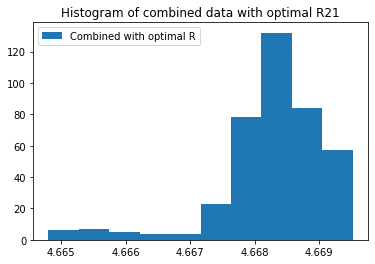

In [23]:
data1_new = [[data1_fixed_int[i][0] * optimal_x[0], data1_fixed_int[i][1] * optimal_x[0]] for i in range(len(data1_fixed_int))]
all_data = data1_new + data2_fixed_int
plt.hist([(inter[0] + inter[1]) / 2 for inter in all_data], label="Combined with optimal R")
plt.legend()
plt.title('Histogram of combined data with optimal R21')
plt.savefig('result/comb_data.png', dpi = 1000)